### 高斯核函数

In [21]:
import numpy as np
import pandas as pd
from sklearn import svm #导出svm import sklearn.svm
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-np.power(x1 - x2, 2).sum() / (2 * sigma ** 2)) #sigma ** 2为sigma的平方

In [4]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

### 导入数据

In [12]:
mat = sio.loadmat('/Users/mac/Desktop/ml/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns = ['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


### 可视化数据

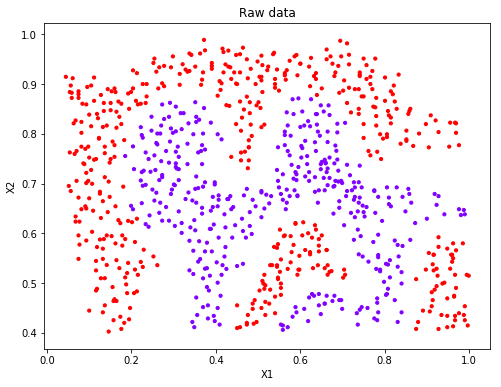

In [18]:
fig , ax = plt.subplots(figsize=(8,6))
#scatter（输入量x1，输入量x2，点的大小，颜色序列，colormap）
ax.scatter(data['X1'],data['X2'],s=10,c=data['y'],cmap='rainbow')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

### 使用高斯核函数

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强

In [22]:
svc = svm.SVC(C = 100, kernel = 'rbf', gamma = 10, probability = True)

In [23]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [31]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]
print (predict_prob)

[3.00000090e-14 3.00000090e-14 3.00000090e-14 1.45744983e-06
 7.06164492e-03 3.24444783e-03 2.07608642e-07 1.26198774e-02
 3.00000090e-14 3.00000090e-14 1.02951532e-13 1.46329604e-02
 3.38505626e-11 3.00000090e-14 3.00000090e-14 1.28742792e-09
 2.55673224e-01 5.71680661e-01 1.34583236e-13 3.00000090e-14
 1.69633632e-02 1.89441763e-05 1.04366124e-02 1.29450372e-01
 2.13180090e-02 4.27475534e-06 2.21086386e-06 5.44866607e-07
 6.11544799e-06 2.63333658e-02 1.68370242e-01 3.20259108e-02
 3.00000090e-14 3.00000090e-14 3.00000090e-14 3.00000090e-14
 3.00000090e-14 1.56223772e-12 1.07930280e-09 2.17199021e-13
 3.00000090e-14 3.00000090e-14 3.00000090e-14 3.00000090e-14
 3.00000090e-14 3.00000090e-14 3.00000090e-14 4.92172294e-10
 4.03216817e-13 3.00000090e-14 1.31584986e-08 3.78819150e-07
 1.87026433e-05 4.84986263e-13 3.00000090e-14 3.00000090e-14
 3.00000090e-14 3.00000090e-14 3.00000090e-14 1.64802247e-10
 3.67483997e-09 3.00000090e-14 6.82040400e-14 1.11851339e-05
 7.04272035e-07 6.851148

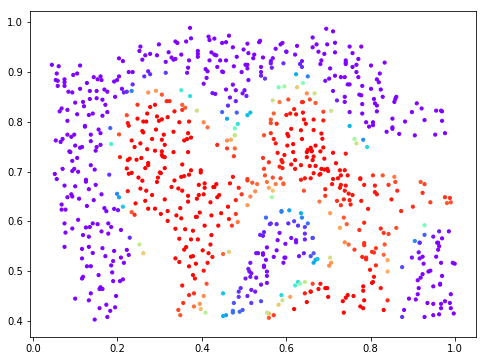

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=10, c=predict_prob, cmap='rainbow')
plt.show()